<a href="https://colab.research.google.com/github/pinilDissanayaka/LangGraph-Simple-AI-agent/blob/main/agent%20with%20tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import os
from google.colab import userdata
from langgraph.graph import StateGraph, END, START
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from typing import  Annotated
from typing_extensions import TypedDict
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

In [ ]:
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

In [ ]:
llm=ChatGroq()

In [69]:
wikipedia = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=1000)
wikipedia_tool = WikipediaQueryRun(api_wrapper=wikipedia)

In [70]:
tool=[wikipedia_tool]

In [ ]:
class State(TypedDict):
  messages:Annotated[list, add_messages]

In [ ]:
graph_flow=StateGraph(State)

In [ ]:
def llm_call(state:State):
  question=state["messages"][-1]
  return {"messages":llm.invoke(question.content)}

In [ ]:
graph_flow.add_node("llm", llm_call)

graph_flow.add_edge(START, "llm")
graph_flow.add_edge("llm", END)

In [ ]:
graph=graph_flow.compile()

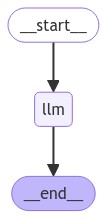

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [60]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    # user_input is already a HumanMessage object, so no need to recreate it
    for event in graph.stream({"messages": user_input}): # Pass only the HumanMessage object
        for value in event.values():
            print("Assistant:", value['messages'].content)

Assistant: Hello! Welcome to the AI language model. How can I help you today? If you have any questions, need help with a specific topic, or just want to chat, feel free to ask. I'm here to assist you. 😊
Assistant: I'm just a computer program, so I don't have feelings or emotions like a human does. However, I'm here and ready to assist you with any questions you have to the best of my ability! Is there something you would like to know?


KeyboardInterrupt: Interrupted by user